In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv


# define some functions

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return r, phi, theta

def convert_points_to_spherical(points):
    points_set_polars = []
    for point in points:
        x = point[0]
        y = point[1]
        z = point[2]
        r, phi, theta = cartesian_to_spherical(x, y, z)
        points_set_polars.append((r, phi, theta))
    return np.array(points_set_polars)


def spherical_to_cartesian(r, phi, theta):
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z

def convert_points_to_cartesian(points):
    points_set_cartesians = []
    for point in points:
        r = point[0]
        phi = point[1]
        theta = point[2]
        x, y, z = spherical_to_cartesian(r, phi, theta)
        points_set_cartesians.append((x, y, z))
    return np.array(points_set_cartesians)

#function that computes the angle between two vectors

def angle_between_vectors(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    cosine_angle = dot_product / (magnitude_v1 * magnitude_v2)
    angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return angle_rad


def peak_value(N, alpha):
    return N * (1 - np.cos(alpha)) / 2

# Function to save indices to .txt file

def save_indices_to_file(indices, pmt_set_num):
    filename = f"random_indices_PMTSet{pmt_set_num}.txt"
    np.savetxt(filename, indices, fmt='%d')
    print(f"Saved random indices for PMTSet {pmt_set_num} to {filename}\n")

In [22]:
# Load the CSV file with PMT positions
data = np.genfromtxt('pmt_positions.csv', delimiter=',', skip_header=1)

In [23]:
print(len(data))

9389


In [24]:
# Total number of PMTs is 9389. Not sure if indices are counted from 0 or from 1 in rat,
# but when I apply a mask it counts them the way python does (so the first index is 0)

print(data.shape)
print(data.size)

(9389, 3)
28167


In [25]:

# Import PMT positions and normalize
# positions normalized to nor, 1 unless otherwise specified in variable name (raw)

all_pos_cart_raw = np.genfromtxt('pmt_positions.csv', delimiter=',', skip_header=1)
all_pos_cart = all_pos_cart_raw / np.linalg.norm(all_pos_cart_raw, axis=1)[:, np.newaxis]
all_pos_sph = convert_points_to_spherical(all_pos_cart)

In [27]:
print(all_pos_cart_raw.shape)
print(all_pos_sph.shape)

(9389, 3)
(9389, 3)


In [29]:
# The angle between two vectors can be calculated if the vectors are in cartesian coords

# Import Node positions (phi, theta)

nodes_pos_sph = np.genfromtxt('More_Nodes_Grid.csv', delimiter=',', skip_header=1)
nodes_pos_cart = convert_points_to_cartesian(nodes_pos_sph)

print(nodes_pos_sph.shape)
print(nodes_pos_cart.shape)

(342, 3)
(342, 3)


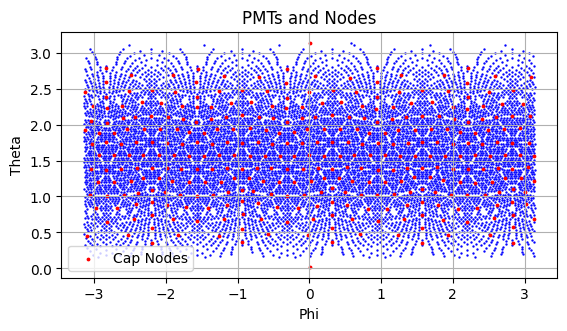

In [31]:
# Create a new plot of all PMTs and Nodes
plt.scatter(all_pos_sph[:,1], all_pos_sph[:,2], s=0.5, color='blue')  # Original points
plt.scatter(nodes_pos_sph[:,1], nodes_pos_sph[:,2], s=3, color='red', label='Cap Nodes')  # Clicked points in red

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('PMTs and Nodes')

# Add a text box with the value of vectorial_sum and its length
#text = f'Vectorial Sum: {vector_sum}\nLength: {vector_length:.2f}'
#plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()


plt.show()

In [ ]:
# Ok! looks good so far
# The order of PMTs here should match that in rat tables or whatever
# Polar/cartesian identification via index -> data[i]

# Transform removed indices into included indices



In [45]:
def create_kept_indices_file(total_pmt_count, removed_indices_file, output_file):
    removed_indices = np.loadtxt(removed_indices_file, dtype=int)
    all_indices = np.arange(total_pmt_count)
    kept_indices = np.setdiff1d(all_indices, removed_indices)
    np.savetxt(output_file, kept_indices, fmt='%d')
    print(f"Kept indices saved to {output_file}")

# Usage
create_kept_indices_file(
    total_pmt_count=len(all_pos_sph),
    removed_indices_file="random_indices_PMTSet16.txt",
    output_file="PMTSet16_indices.txt"
)

Kept indices saved to PMTSet16_indices.txt


In [84]:
random_set_numbers = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

for i in random_set_numbers:
    create_kept_indices_file(
        total_pmt_count=len(all_pos_sph),
        removed_indices_file=f"random_indices_PMTSet{i}.txt",
        output_file=f"PMTSet{i}_indices.txt"
    )

Kept indices saved to PMTSet16_indices.txt
Kept indices saved to PMTSet17_indices.txt
Kept indices saved to PMTSet18_indices.txt
Kept indices saved to PMTSet19_indices.txt
Kept indices saved to PMTSet20_indices.txt
Kept indices saved to PMTSet21_indices.txt
Kept indices saved to PMTSet22_indices.txt
Kept indices saved to PMTSet23_indices.txt
Kept indices saved to PMTSet24_indices.txt
Kept indices saved to PMTSet25_indices.txt
Kept indices saved to PMTSet26_indices.txt
Kept indices saved to PMTSet27_indices.txt
Kept indices saved to PMTSet28_indices.txt
Kept indices saved to PMTSet29_indices.txt


In [46]:
# The thing above should be the one with 400 random missing ones, I think
# Want to create new variable with only these PMT positions instead of all, then plot
# and compare with Set 16 from the help-from-analyzers document



In [47]:
def get_active_positions(indices_file, all_pos_cart, all_pos_sph):
    indices = np.loadtxt(indices_file, dtype=int)
    active_pos_cart = all_pos_cart[indices]
    active_pos_sph = all_pos_sph[indices]
    return active_pos_cart, active_pos_sph

In [48]:
active_pos_cart, active_pos_sph = get_active_positions('PMTSet16_indices.txt', all_pos_cart, all_pos_sph)

print(active_pos_cart.shape)
print(active_pos_sph.shape)

(8989, 3)
(8989, 3)


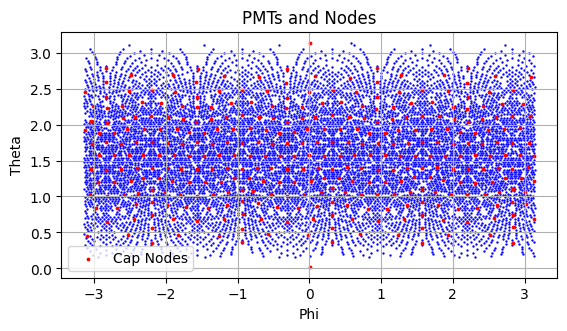

In [49]:
# Plot to check

# Create a new plot of all PMTs and Nodes
plt.scatter(active_pos_sph[:,1], active_pos_sph[:,2], s=0.5, color='blue')  # Original points
plt.scatter(nodes_pos_sph[:,1], nodes_pos_sph[:,2], s=3, color='red', label='Cap Nodes')  # Clicked points in red

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('PMTs and Nodes')

# Add a text box with the value of vectorial_sum and its length
#text = f'Vectorial Sum: {vector_sum}\nLength: {vector_length:.2f}'
#plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()

plt.savefig('PMTSet16_test.pdf', format='pdf')

plt.show()

In [50]:
#They don't look the same, maybe I got the indexing wrong?
# Maybe I regenerated the random sets??

# Indices seem removed correctly, how did I plot it?
# Yeah if I rerun MakeAllDistributionPlots.py, then I made new random choices ... I wanted to check what I put on docdb but snopl doesn't load atm for some reason; assume those from the removed_indices folder are the correct ones

# Now write function to make index lists between given values (will make them and keep them so I can loop through and have generalized code for any mask)

In [70]:
def write_numbers_to_file(min_value, max_value, filename):
    numbers = np.arange(min_value, max_value + 1, dtype=int)
    np.savetxt(filename, numbers, fmt='%d')
    print(f"Numbers from {min_value} to {max_value} saved to {filename}")

# Usage
write_numbers_to_file(400, len(all_pos_cart) - 1, "PMTSet2_indices.txt")

Numbers from 400 to 9388 saved to PMTSet2_indices.txt


In [83]:
write_numbers_to_file(7000, len(all_pos_cart) - 1, "PMTSet15_indices.txt")

Numbers from 7000 to 9388 saved to PMTSet15_indices.txt


In [56]:
active_pos_cart, active_pos_sph = get_active_positions('PMTSet2_indices.txt', all_pos_cart, all_pos_sph)

print(active_pos_cart.shape)
print(active_pos_sph.shape)

(8589, 3)
(8589, 3)


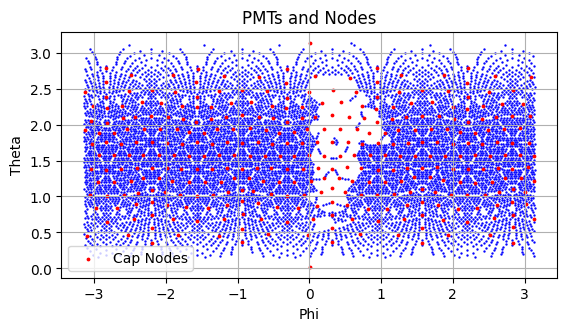

In [57]:
# Plot to check

# Create a new plot of all PMTs and Nodes
plt.scatter(active_pos_sph[:,1], active_pos_sph[:,2], s=0.5, color='blue')  # Original points
plt.scatter(nodes_pos_sph[:,1], nodes_pos_sph[:,2], s=3, color='red', label='Cap Nodes')  # Clicked points in red

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('PMTs and Nodes')

# Add a text box with the value of vectorial_sum and its length
#text = f'Vectorial Sum: {vector_sum}\nLength: {vector_length:.2f}'
#plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()

plt.savefig('PMTSet16_test.pdf', format='pdf')

plt.show()

In [58]:
# That looks pretty good! Ok, now we have what we need; Now compute vector sum

In [60]:
# Compute the vectorial sum along axis 0
vector_sum = np.sum(active_pos_cart, axis=0)
vector_sum_length = np.linalg.norm(vector_sum)

print(vector_sum)
print(vector_sum_length)

[-614.53821679 -277.8412606    52.89058417]
676.4986325791929


Now looping over alpha values
for alpha = pi / 3
Computing cap counts for alpha = pi / 3
Cap counts computed; now generating histogram and calculating stats ... 


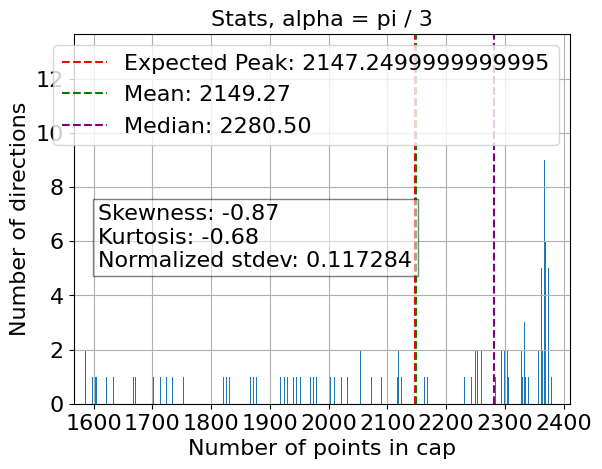

for alpha = pi / 4
Computing cap counts for alpha = pi / 4
Cap counts computed; now generating histogram and calculating stats ... 


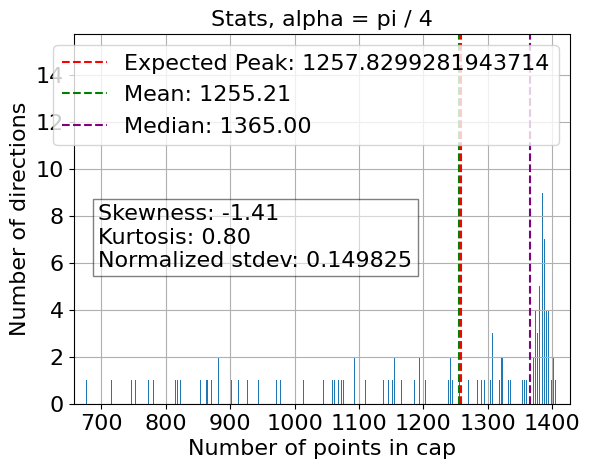

for alpha = pi / 6
Computing cap counts for alpha = pi / 6
Cap counts computed; now generating histogram and calculating stats ... 


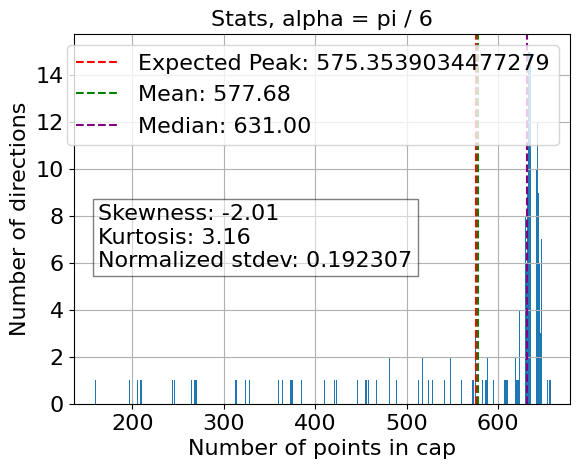

for alpha = pi / 8
Computing cap counts for alpha = pi / 8
Cap counts computed; now generating histogram and calculating stats ... 


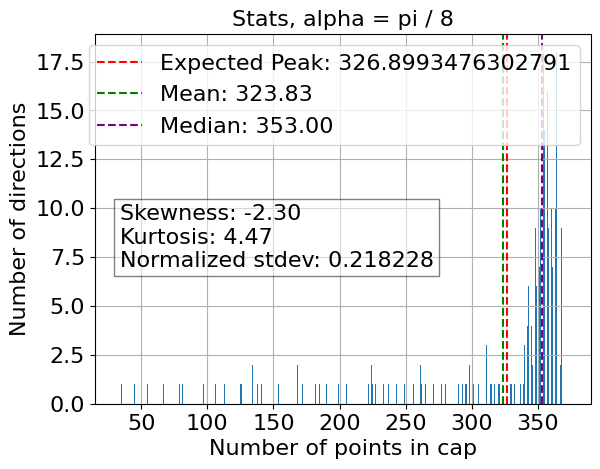

for alpha = pi / 10
Computing cap counts for alpha = pi / 10
Cap counts computed; now generating histogram and calculating stats ... 


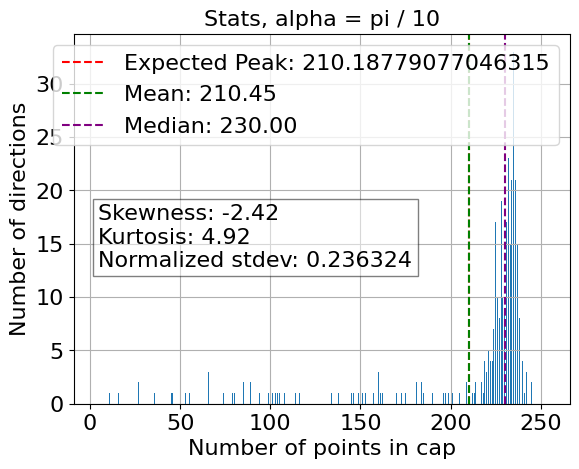

In [67]:
# I named it Set 2 when it was actually 3 but it's fine

# Ok, now for the actual stuff; copy code from MakeAllDistributionPlots and add things to it

import pandas as pd
from scipy.stats import skew, kurtosis

pi_over_values = [3, 4, 6, 8, 10]

# Create or initialize the CSV file
# We will use a DataFrame to store stats
stats_df = pd.DataFrame()
stats_df['Metric'] = ['total N', 'mean', 'median', 'variance', 'stdev', 'normalized stdev', 'skewness', 'kurtosis']

print("Now looping over alpha values")



for pi_over_index in range(len(pi_over_values)):

    # Initialize points_in_cap_count outside the loop over pi_over values
    points_in_cap_count = np.zeros(len(nodes_pos_cart), dtype=int)

    pi_over = pi_over_values[pi_over_index]

    print("for alpha = pi / " + str(pi_over))

    print("Computing cap counts for alpha = pi / " + str(pi_over))

    for i in range(len(nodes_pos_cart)):
        cap_center =nodes_pos_cart[i]
        cap_center_polars = nodes_pos_sph[i]
        points_in_cap_set = []

        for j in range(len(active_pos_cart)):
            angle = angle_between_vectors(cap_center, active_pos_cart[j])
            if angle < np.pi / pi_over:
                points_in_cap_set.append(active_pos_cart[j])

        points_in_cap_set = np.array(points_in_cap_set)

        points_in_cap_count[i] += len(points_in_cap_set)  # Accumulate count within each iteration

    print("Cap counts computed; now generating histogram and calculating stats ... ")



    N = len(active_pos_cart)  # Ensure you use the correct length for N here



    peak = peak_value(N, np.pi / pi_over)

        # Compute histogram
    hist_values, bin_edges = np.histogram(points_in_cap_count, bins=np.arange(points_in_cap_count.max() + 2))

            # Plot histogram
    plt.bar(bin_edges[:-1], hist_values, width=0.5, align='center')

        # Set larger font sizes
    font_size = 16
    plt.xlabel('Number of points in cap', fontsize=font_size)
    plt.ylabel('Number of directions', fontsize=font_size)
    plt.title('Histogram of points in cap per direction', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)

        # Find the first non-zero bin edge
    non_zero_index = np.nonzero(hist_values)[0][0]

        # Automatically adjust x-axis limits
    xmin = bin_edges[non_zero_index] - 20
    xmax = max(bin_edges) + 20
    plt.xlim(xmin, xmax)

    plt.grid(True)

    plt.axvline(x=peak, color='red', linestyle='--', label='Expected Peak: {}'.format(peak))

        # Compute mean, median, and variance, skew, kurtosis

    alpha = f'alpha = pi/{pi_over}'
    # Compute the relevant statistics
    total_N = N
    mean_value = np.mean(points_in_cap_count)
    median_value = np.median(points_in_cap_count)
    variance_value = np.var(points_in_cap_count)
    stdev_value = np.sqrt(variance_value)
    normalized_stdev = stdev_value / mean_value
    skewness_value = skew(points_in_cap_count)
    kurtosis_value = kurtosis(points_in_cap_count)

        # Plot mean, median, and variance as vertical lines
    plt.axvline(x=mean_value, color='green', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=median_value, color='purple', linestyle='--', label='Median: {:.2f}'.format(median_value))

        # Add variance and normalized standard deviation to legend

    # Add text for skewness and kurtosis
    plt.text(0.05, 0.45, f'Skewness: {skewness_value:.2f}\nKurtosis: {kurtosis_value:.2f}\nNormalized stdev: {normalized_stdev:.6f}',
             horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5), fontsize=font_size)

        # Add legend with larger font size
    plt.legend(fontsize=font_size)
    plt.title("Stats, alpha = pi / " + str(pi_over), fontsize=font_size)

        # Save the plot with a larger font size
        #plt.savefig("Stats_PMTSet"+ str(k + 1) + "_PiOver" + str(pi_over) + ".pdf", format='pdf')
    plt.show()

    # Add the statistics to the DataFrame
    stats_df[alpha] = [
        total_N,
        mean_value,
        median_value,
        variance_value,
        stdev_value,
        normalized_stdev,
        skewness_value,
        kurtosis_value
    ]

In [68]:
# Save the DataFrame to CSV
stats_df.to_csv('PMTSet2_stats.csv', index=False)

In [4]:
# reformat into new csv files for nicer comparison
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

file_list = sorted(glob.glob("PMTSet*_stats.csv"))

# Dictionary to store data for each alpha value
alpha_data = {}

# Read each file and organize data
for file in file_list:
    set_name = file.split("_")[0]  # Extract "PMTSet1" from filename
    df = pd.read_csv(file, index_col=0)  # Read CSV, assuming first column is row labels (metrics)

    # Iterate over alpha values (columns)
    for alpha in df.columns:
        if alpha not in alpha_data:
            alpha_data[alpha] = {}
        alpha_data[alpha][set_name] = df[alpha]  # Store column under PMTSet name

# Create new CSV files for each alpha value
for alpha, data in alpha_data.items():
    new_df = pd.DataFrame(data)
    safe_alpha = alpha.replace("/", "÷")  # Replace '/' with a division symbol or another safe character
    new_filename = f"{safe_alpha}.csv".replace(" ", "_")
    new_df.to_csv(new_filename)
    print(f"Saved {new_filename}")

print("Reformatting complete!")

# Get all the new alpha stats CSV files
file_list = sorted(glob.glob("alpha*_stats.csv"))

for file in file_list:
    alpha_value = file.split("(")[1].split(")")[0]  # Extract alpha value from filename
    safe_alpha = alpha_value.replace("/", "÷")  # Replace '/' with a division symbol or another safe character

    df = pd.read_csv(file, index_col=0)  # Read CSV, assuming first column is row labels (metrics)

    pmt_sets = np.arange(1, df.shape[1] + 1)  # PMT sets (1 to N)

    # Iterate over each row (metric)
    for metric_name, values in df.iterrows():
        plt.figure(figsize=(8, 5))

        # Background shading
        plt.axvspan(0.5, 15.5, color="lightblue", alpha=0.3)  # Sets 1-15
        plt.axvspan(15.5, 29.5, color="lightpink", alpha=0.3)  # Sets 16-29

        # Plot data
        plt.plot(pmt_sets, values, marker="o", linestyle="-", label=f"α = {alpha_value}")

        # Labels and title
        plt.xlabel("PMT Set Number")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs PMT Set (α = {alpha_value})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)

        # Save figure
        filename = f"{metric_name}_alpha({safe_alpha}).png".replace(" ", "_")
        plt.savefig(filename, format = 'pdf')
        plt.close()

        print(f"Saved plot: {filename}")

print("All plots generated!")

Saved alpha_=_pi÷3.csv
Saved alpha_=_pi÷4.csv
Saved alpha_=_pi÷6.csv
Saved alpha_=_pi÷8.csv
Saved alpha_=_pi÷10.csv
Reformatting complete!
All plots generated!


In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import re

# Get all PMTSet stats CSV files
file_list = sorted(glob.glob("PMTSet*_stats.csv"))

# Dictionary to store data for each alpha value
alpha_data = {}

# Read each file and organize data
for file in file_list:
    match = re.search(r"PMTSet(\d+)", file)  # Extract set number
    if not match:
        continue
    set_number = int(match.group(1))  # Convert to integer for sorting
    set_name = f"PMTSet{set_number}"  # Standardize the name

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Iterate over alpha values (columns)
    for alpha in df.columns:
        if alpha not in alpha_data:
            alpha_data[alpha] = {}
        alpha_data[alpha][set_number] = df[alpha]  # Store column under numerical index

# Create new CSV files for each alpha value
for alpha, data in alpha_data.items():
    # Sort PMT sets numerically
    sorted_data = dict(sorted(data.items()))
    new_df = pd.DataFrame(sorted_data)

    # Fix filename
    safe_alpha = alpha.replace("/", "÷").replace(" ", "_")
    new_filename = f"alpha({safe_alpha})_stats.csv"

    new_df.to_csv(new_filename)
    print(f"Saved {new_filename}")

print("Reformatting complete!")

# Get all the new alpha stats CSV files
file_list = sorted(glob.glob("alpha(*_stats.csv"))

for file in file_list:
    alpha_value = file.split("(")[1].split(")")[0].split("_")[0]  # Extract alpha value
    safe_alpha = alpha_value.replace("/", "÷")

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Extract PMT set numbers and sort them numerically
    pmt_sets = sorted([int(re.search(r"PMTSet(\d+)", col).group(1)) for col in df.columns])

    # Iterate over each row (metric)
    for metric_name, values in df.iterrows():
        plt.figure(figsize=(8, 5))

        # Background shading
        plt.axvspan(0.5, 15.5, color="lightblue", alpha=0.3)  # Sets 1-15
        plt.axvspan(15.5, 29.5, color="lightpink", alpha=0.3)  # Sets 16-29

        # Sort values by PMT set number
        sorted_values = values.loc[[f"PMTSet{n}" for n in pmt_sets]]

        # Plot data
        plt.plot(pmt_sets, sorted_values, marker="o", linestyle="-", label=f"α = {alpha_value}")

        # Labels and title
        plt.xlabel("PMT Set Number")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs PMT Set (α = {alpha_value})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)

        # Save figure
        filename = f"{metric_name}_alpha({safe_alpha}).pdf".replace(" ", "_")
        plt.savefig(filename, format="pdf")
        plt.close()

        print(f"Saved plot: {filename}")

print("All plots generated!")


Saved alpha(alpha_=_pi÷3)_stats.csv
Saved alpha(alpha_=_pi÷4)_stats.csv
Saved alpha(alpha_=_pi÷6)_stats.csv
Saved alpha(alpha_=_pi÷8)_stats.csv
Saved alpha(alpha_=_pi÷10)_stats.csv
Reformatting complete!


AttributeError: 'NoneType' object has no attribute 'group'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import re

# Get all PMTSet stats CSV files
file_list = sorted(glob.glob("PMTSet*_stats.csv"))

# Dictionary to store data for each alpha value
alpha_data = {}

# Read each file and organize data
for file in file_list:
    match = re.search(r"PMTSet(\d+)", file)  # Extract set number
    if not match:
        continue
    set_number = int(match.group(1))  # Convert to integer for sorting
    set_name = f"PMTSet{set_number}"  # Standardize the name

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Iterate over alpha values (columns)
    for alpha in df.columns:
        if alpha not in alpha_data:
            alpha_data[alpha] = {}
        alpha_data[alpha][set_number] = df[alpha]  # Store column under numerical index

# Create new CSV files for each alpha value
for alpha, data in alpha_data.items():
    # Sort PMT sets numerically
    sorted_data = dict(sorted(data.items()))
    new_df = pd.DataFrame(sorted_data)

    # Fix filename
    safe_alpha = alpha.replace("/", "÷").replace(" ", "_")
    new_filename = f"alpha({safe_alpha})_stats.csv"

    new_df.to_csv(new_filename)
    print(f"Saved {new_filename}")

print("Reformatting complete!")

# Get all the new alpha stats CSV files
file_list = sorted(glob.glob("alpha(*_stats.csv"))

for file in file_list:
    alpha_value = file.split("(")[1].split(")")[0].split("_")[0]  # Extract alpha value
    safe_alpha = alpha_value.replace("/", "÷")

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Print column names to debug if needed
    print(f"Processing {file}, columns: {df.columns.tolist()}")

    # Extract PMT set numbers and sort them numerically
    pmt_sets = []
    for col in df.columns:
        match = re.search(r"PMTSet(\d+)", col)
        if match:
            pmt_sets.append(int(match.group(1)))  # Convert to integer
        else:
            print(f"⚠️ Warning: Unexpected column name '{col}' (ignored)")

    pmt_sets.sort()  # Ensure order

    # Iterate over each row (metric)
    for metric_name, values in df.iterrows():
        plt.figure(figsize=(8, 5))

        # Background shading
        plt.axvspan(0.5, 15.5, color="lightblue", alpha=0.3)  # Sets 1-15
        plt.axvspan(15.5, 29.5, color="lightpink", alpha=0.3)  # Sets 16-29

        # Sort values by PMT set number
        sorted_values = [values[f"PMTSet{n}"] for n in pmt_sets if f"PMTSet{n}" in values]

        # Plot data
        plt.plot(pmt_sets, sorted_values, marker="o", linestyle="-", label=f"α = {alpha_value}")

        # Labels and title
        plt.xlabel("PMT Set Number")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs PMT Set (α = {alpha_value})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)

        # Save figure
        filename = f"{metric_name}_alpha({safe_alpha}).pdf".replace(" ", "_")
        plt.savefig(filename, format="pdf")
        plt.close()

        print(f"Saved plot: {filename}")

print("All plots generated!")


Saved alpha(alpha_=_pi÷3)_stats.csv
Saved alpha(alpha_=_pi÷4)_stats.csv
Saved alpha(alpha_=_pi÷6)_stats.csv
Saved alpha(alpha_=_pi÷8)_stats.csv
Saved alpha(alpha_=_pi÷10)_stats.csv
Reformatting complete!
Processing alpha(alpha_=_pi÷10)_stats.csv, columns: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
⚠️ Warning: Unexpected column name '1' (ignored)
⚠️ Warning: Unexpected column name '2' (ignored)
⚠️ Warning: Unexpected column name '3' (ignored)
⚠️ Warning: Unexpected column name '4' (ignored)
⚠️ Warning: Unexpected column name '5' (ignored)
⚠️ Warning: Unexpected column name '6' (ignored)
⚠️ Warning: Unexpected column name '7' (ignored)
⚠️ Warning: Unexpected column name '8' (ignored)
⚠️ Warning: Unexpected column name '9' (ignored)
⚠️ Warning: Unexpected column name '10' (ignored)
⚠️ Warning: Unexpected column name '11' (ignored)
⚠️ Warning: Unexpected column name '1

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import re

# Get all PMTSet stats CSV files
file_list = sorted(glob.glob("PMTSet*_stats.csv"))

# Dictionary to store data for each alpha value
alpha_data = {}

# Read each file and organize data
for file in file_list:
    match = re.search(r"PMTSet(\d+)", file)  # Extract set number
    if not match:
        continue
    set_number = int(match.group(1))  # Convert to integer
    set_name = str(set_number)  # Use just the number as a column label

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Iterate over alpha values (columns)
    for alpha in df.columns:
        if alpha not in alpha_data:
            alpha_data[alpha] = {}
        alpha_data[alpha][set_number] = df[alpha]  # Store column under numerical index

# Create new CSV files for each alpha value
for alpha, data in alpha_data.items():
    # Sort PMT sets numerically
    sorted_data = dict(sorted(data.items()))
    new_df = pd.DataFrame(sorted_data)

    # Fix filename for alpha values
    safe_alpha = alpha.replace("/", "÷").replace("*", "×").replace("(", "").replace(")", "").replace(" ", "_")
    new_filename = f"alpha_({safe_alpha})_stats.csv"

    new_df.to_csv(new_filename)
    print(f"Saved {new_filename}")

print("Reformatting complete!")

# Get all the new alpha stats CSV files
file_list = sorted(glob.glob("alpha_*_stats.csv"))

for file in file_list:
    # Extract alpha value from filename
    #match = re.search(r"alpha\((.*?)\)_stats\.csv", file)
    match = re.search(r"alpha_\((.*?)\)_stats\.csv", file)

    if match:
        alpha_value = match.group(1)  # Extract text inside parentheses
    else:
        print(f"⚠️ Warning: Could not extract alpha value from {file}, skipping...")
        continue
    safe_alpha = alpha_value.replace("/", "÷").replace("*", "×")

    df = pd.read_csv(file, index_col=0)  # Read CSV

    # Convert column names to integers (PMT set numbers)
    try:
        pmt_sets = sorted([int(col) for col in df.columns])
    except ValueError:
        print(f"⚠️ Warning: Unexpected column names in {file}, skipping...")
        continue

    # Iterate over each row (metric)
    for metric_name, values in df.iterrows():
        plt.figure(figsize=(8, 5))

        # Background shading
        plt.axvspan(0.5, 15.5, color="lightblue", alpha=0.3)  # Sets 1-15
        plt.axvspan(15.5, 29.5, color="lightpink", alpha=0.3)  # Sets 16-29

        # Sort values by PMT set number
        sorted_values = [values[str(n)] for n in pmt_sets if str(n) in values]

        # Plot data
        plt.plot(pmt_sets, sorted_values, marker="o", linestyle="-", label=f"α = {alpha_value}")

        # Labels and title
        plt.xlabel("PMT Set Number")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs PMT Set (α = {alpha_value})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)

        # Save figure
        filename = f"{metric_name}_alpha_{safe_alpha}.pdf".replace(" ", "_")
        plt.savefig(filename, format="pdf")
        plt.close()

        print(f"Saved plot: {filename}")

print("All plots generated!")


Saved alpha_(alpha_=_pi÷3)_stats.csv
Saved alpha_(alpha_=_pi÷4)_stats.csv
Saved alpha_(alpha_=_pi÷6)_stats.csv
Saved alpha_(alpha_=_pi÷8)_stats.csv
Saved alpha_(alpha_=_pi÷10)_stats.csv
Reformatting complete!
Saved plot: vector_sum_x_alpha_alpha_=_pi÷10.pdf
Saved plot: vector_sum_y_alpha_alpha_=_pi÷10.pdf
Saved plot: vector_sum_z_alpha_alpha_=_pi÷10.pdf
Saved plot: vector_sum_norm_alpha_alpha_=_pi÷10.pdf
Saved plot: total_N_alpha_alpha_=_pi÷10.pdf
Saved plot: mean_alpha_alpha_=_pi÷10.pdf
Saved plot: median_alpha_alpha_=_pi÷10.pdf
Saved plot: variance_alpha_alpha_=_pi÷10.pdf
Saved plot: stdev_alpha_alpha_=_pi÷10.pdf
Saved plot: normalized_stdev_alpha_alpha_=_pi÷10.pdf
Saved plot: skewness_alpha_alpha_=_pi÷10.pdf
Saved plot: kurtosis_alpha_alpha_=_pi÷10.pdf
Saved plot: bowley_skewness_alpha_alpha_=_pi÷10.pdf
Saved plot: moors_kurtosis_alpha_alpha_=_pi÷10.pdf
Saved plot: vector_sum_x_alpha_alpha_=_pi÷3.pdf
Saved plot: vector_sum_y_alpha_alpha_=_pi÷3.pdf
Saved plot: vector_sum_z_alpha_alph